<h1><center> United States Election 2020: Data Analysis based on Countities Characteristics </center></h1>
<h4><center>Maksym Oliinyk, 1004506377 <br> Big Data Tools for Economists (ECO225H1 S)</center></h4>

---
<h2><bold> Outline: </bold></h2>

1. Introduction  
2. Data Analysis 
3. Summary 
4. Future Steps 

---


<h2><center> Introduction </center></h2>

---

The project analyses how different preliminary counties' characteristics influence total votes they get during the United States election of 2020. The total population and female population proportion are among the preliminary characteristics. The analysis includes two datasets obtained from https://www.kaggle.com/unanimad/us-election-2020 and https://www.kaggle.com/pauldesalvo/2020-election-analysis/data?select=president_counties.csv. The primary dataset, US Election 2020, contains 32177 observations and six variables:  
- ***state***: state of the United State.
- ***county***: county of the corresponding state.
- ***candidate***: presidential candidate.
- ***party***: party of the presidential candidate.
- ***total_votes***: number of votes that the presidential candidate got in the county in the corresponding state.
- ***won***: a boolean expression indicating whether the presidential candidate won in in the county in the corresponding state (***True*** = *won* and ***False*** = *lost*).

The additional dataset, 2020 Election analysis, contains 3045 observations and 17 variables, from which six comes from the primary dataset, *state*, *county*, *candidate*, *party*, *total_votes*, and *won*:
- ***fips***: numbers that are used to designate certain geographic locations.
- ***state_code***: code of the state.
- ***male***: number of males in the county in the corresponding state.
- ***female***: number of females in the county in the corresponding state. 
- ***median_age***: median age in the county in the corresponding state.
- ***population***: population in the county in the corresponding state. 
- ***female_percentage***: percantage of female population in the county in the corresponding state.
- ***lat***: latitude coordinates of the county.
- ***long***: longitude coordinates of the county. 
- ***color***: colour of the party (Republicans = red and Democrats = blue).

The additional dataset contains a smaller amount of observations since it includes only the won counties of each party. However, it is used to extract preliminary characteristics of the county. 

The data analysis suggests that the preliminary counties' characteristics, such as female population proportion and total population (independent variables), have explanatory power on total votes a party gets (dependent variable). However, to conduct an integrated study, the project recommends incorporating complementary data sources of county characteristics. 

The main statements that analysis presents are: 
- *Republicans won most of the counties.* 
- *Democrats got most of the votes.* 
- *Median age for counties where Republican Party won is higher than Democratic Party.*
- *Republican Party won most of the counties with a relatively small population.* 
- *Females are might likely to vote for Democrats than Republicans.*
    - *Similarly, males are might likely to vote for Republicans than Democrats.*
    
---

<h2><center> Data Analysis </center></h2> 

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_president =  pd.read_csv(r"/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/president_county_candidate.csv")
df_president_enrich = pd.read_csv(r"/Users/maximolii/Desktop/UofT/Years/Fourth Year/2/ECO225/Project/ECO225Project/Data/president_counties.csv")

In [5]:
# Check five first observations and variables in the main dataset.
df_president.head(5)

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [6]:
# Check five first observations and variables in the additional dataset.
df_president_enrich.head(5)

,Unnamed: 0,state,county,candidate,party,total_votes,won,fips,state_code,male,female,median_age,population,female_percentage,lat,long,color
0,0,Delaware,Kent County,Joe Biden,DEM,44552,True,10001,DE,84271,90551,37.6,174822,51.796113,39.086169,-75.568422,blue
1,4,Delaware,New Castle County,Joe Biden,DEM,195034,True,10003,DE,268870,286263,38.1,555133,51.566562,39.576833,-75.652692,blue
2,8,Delaware,Sussex County,Donald Trump,REP,71230,True,10005,DE,106429,113111,49.0,219540,51.521818,38.660553,-75.390038,red
3,12,District of Columbia,District of Columbia,Joe Biden,DEM,39041,True,11001,NaN,324881,359617,33.9,684498,52.537334,38.904734,-77.016294,blue
4,19,Florida,Alachua County,Joe Biden,DEM,89704,True,12001,FL,127298,135850,31.3,263148,51.624941,29.674750,-82.357714,blue


As stated in the introduction, the primary dataset contains 32177 observations and six variables, and the supplementary dataset contains 3045 and 17, correspondingly. First, the analysis suggests that, at this stage of the project, secondary variables *fips*, *state_code*, *male*, *female*, *lat*, *long*, and *color* will not provide additional information that could explain effect on total votes that a party gets. For research, it might be significantly important to understand whether counties' characteristics influence the choice of which party to vote, excluding the exogenous variable such as political debates, news, etc. In other words, the analysis tries to invistigate if there any relationship between population characteristics and their voting decision.

In [5]:
# The subset of the dataset; accessing rows with REP party.
df_rep = df_president.loc[df_president.party == "REP"]

# Extracting single column, total_votes.
votes_rep = df_rep["total_votes"]

# Basic summary statistics of total_votes variable for REP party. 
print('Republican Party',"\n"\
      "Min = ", votes_rep.min(),"\n"\
      "Max = ", votes_rep.max(),"\n"\
      "Mean = ", votes_rep.mean(),"\n"\
      "Standard Deviation = ",votes_rep.std())

Republican Party 
Min =  0 
Max =  1145530 
Mean =  16098.79235916253 
Standard Deviation =  45531.30995531571


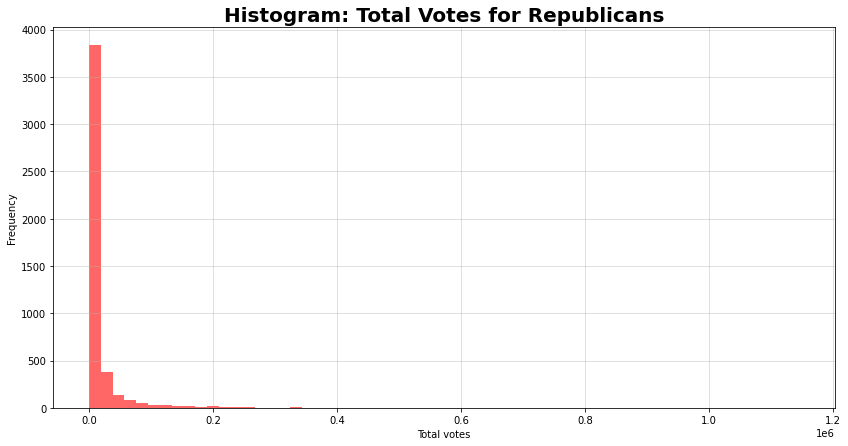

In [6]:
plt.figure(figsize = (14,7))
plt.hist(votes_rep, bins = 60, color= ['#FF000099'])
plt.xlabel("Total votes") 
plt.ylabel("Frequency")
plt.title("Histogram: Total Votes for Republicans",\
          fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

In [7]:
# The subset of the dataset; accessing rows with DEM party.
df_dem = df_president.loc[df_president.party == "DEM"]

# Extracting single column, total_votes.
votes_dem = df_dem["total_votes"]

# Basic summary statistics of total_votes variable for DEM party. 
print('Democratic Party',"\n"\
      "Min =", votes_dem.min(),"\n"\
      "Max =", votes_dem.max(),"\n"\
      "Mean =", votes_dem.mean(),"\n"\
      "Standard Deviation =",votes_dem.std())

Democratic Party 
Min = 0 
Max = 3028885 
Mean = 17709.13749190589 
Standard Deviation = 80206.43718422754


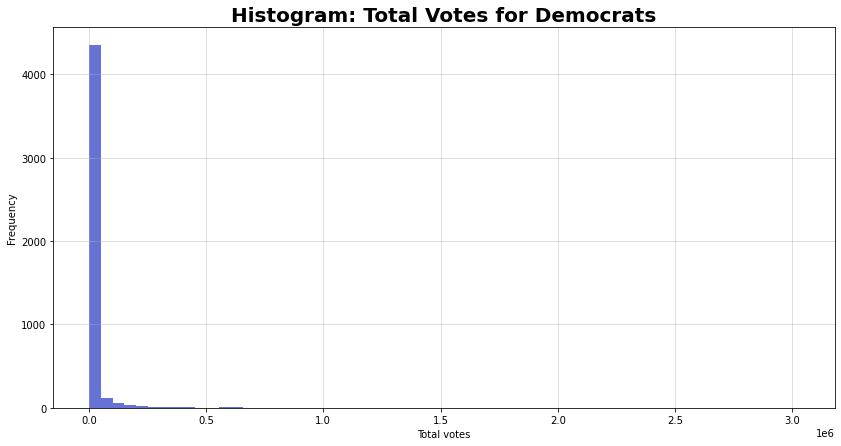

In [8]:
plt.figure(figsize = (14,7))
plt.hist(votes_dem, bins = 60, color= ['#0015BC99'])
plt.xlabel("Total votes") 
plt.ylabel("Frequency")
plt.title("Histogram: Total Votes for Democrats",\
          fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The project starts with descriptive statistics. Above, we can see the comparison between the Republican and Democratic parties (counties level). We can see that Republicans have a lower mean, on average, 16,098 votes per county, while Democrats have an average value of 17,709 votes per county. The gap is 1611 votes or 10%, which is, at a state-level, which might be economically significant. Also, we can observe that the standard deviation of total votes for the Republican Party is lower, suggesting that total votes observations close together. From histograms, we can see that for Republicans, most of the observations lie in the range between 0 and 0.2, while for Democrats, 0 and 0.5, suggesting that Republicans have more total votes at the county level. 

<h3><center> Top Five Candidates based on the total votes </center></h3> 




In [7]:
# Group the dataset by candidate (top 5), and sum up total votes they got. 
df_candidates = df_president[['candidate','total_votes']]\
.groupby(['candidate'], as_index = False).sum()
df_candidates = df_candidates.\
sort_values(by = "total_votes", ascending = False)
df_candidates = df_candidates.reset_index(drop = True)
df_candidates = df_candidates.head(5)

df_candidates

,candidate,total_votes
0,Joe Biden,82046434
1,Donald Trump,74585705
2,Jo Jorgensen,1874183
3,Howie Hawkins,404835
4,Write-ins,254274


In [10]:
# Create new column percent (percent = "total_votes" / (sum of "total_votes") * 100.
df_candidates["percent"] = df_candidates["total_votes"] / df_candidates["total_votes"].sum() * 100

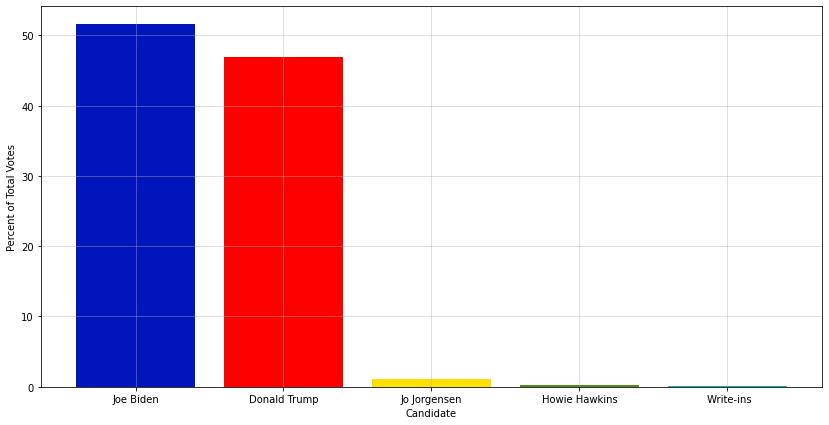

In [11]:
# Plot the barchart of the "percent" (top 5 candidates).
plt.figure(figsize = (14,7))
plt.bar(df_candidates['candidate'],\
        df_candidates['percent'],\
        color=[ '#0015BC', '#FF0000',\
               '#ffdf00', '#508C1B', '#17ADB5'])
plt.xlabel("Candidate")
plt.ylabel("Percent of Total Votes")
plt.grid(alpha = 0.5)
plt.rc('axes', axisbelow = True)

As stated above, Democratic Party got more votes in most counties; thus, Joe Biden, as a presidential candidate from Democratic Party, has more votes than Donald Trump.

<h3><center> Top Five Parties based on the total votes </center></h3> 



In [8]:
# Group the dataset by party (top 5), and sum up total votes they got. 
df_parties = df_president[[ 'party','total_votes']]\
.groupby(['party'], as_index = False).sum()
df_parties = df_parties.sort_values(by = "total_votes", ascending = False)
df_parties = df_parties.reset_index(drop = True)
df_parties = df_parties.head(5)

df_parties.head(5)

,party,total_votes
0,DEM,82046434
1,REP,74585705
2,LIB,1874183
3,GRN,407508
4,WRI,254274


In [9]:
# Create new column percent (percent = "total_votes" / (sum of "total_votes") * 100.
df_parties["percent"] = df_parties["total_votes"]\
/ df_parties["total_votes"].sum() * 100

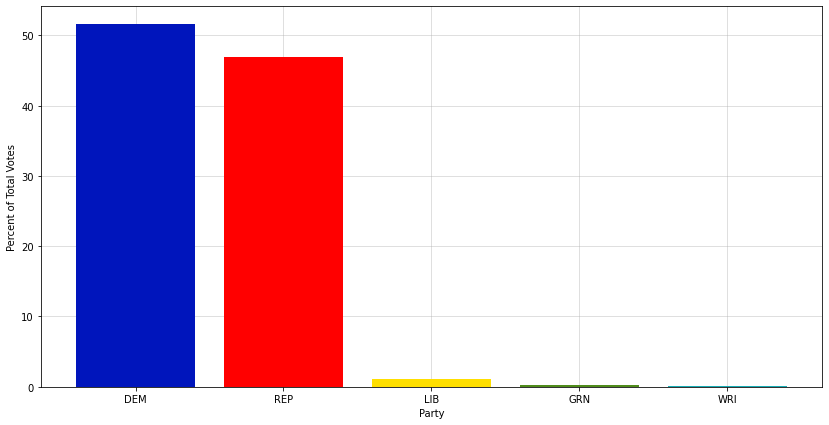

In [14]:
# Plot the barchart of the "percent" (top 5 parties).
plt.figure(figsize = (14,7))
plt.bar(df_parties['party'], df_parties['percent'],\
        color=[ '#0015BC', '#FF0000', '#ffdf00', '#508C1B', '#17ADB5'])
plt.xlabel("Party")
plt.ylabel("Percent of Total Votes")
plt.grid(alpha = 0.5)

Similarly, as stated in Top Five candidates based on the total votes, Democrats got more votes than Republicans. 

<h3><center> Top Five Parties based on the won counties </center></h3> 

In [15]:
# Group the dataset by party (top 5), and sum up total counties they won. 
df_counties = df_president[['party','won']]\
.groupby(['party'], as_index = False).sum()
df_counties = df_counties.sort_values(by = "won",\
                                      ascending = False)
df_counties = df_counties.reset_index(drop = True)
df_counties = df_counties.head(5)

df_counties

,party,won
0,REP,3219
1,DEM,1410
2,WRI,3
3,LIB,1
4,LLP,0


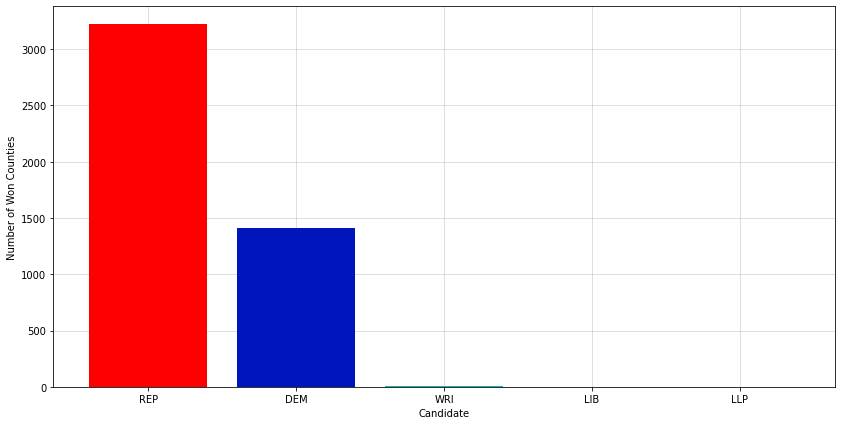

In [16]:
# Plot the barchart of the "won" (top 5 parties).
plt.figure(figsize = (14,7))
plt.bar(df_counties['party'],\
        df_counties['won'],\
        color=[ '#FF0000', '#0015BC',\
               '#17ADB5', '#ffdf00', '#508C1B'])
plt.xlabel("Candidate")
plt.ylabel("Number of Won Counties")
plt.grid(alpha = 0.5)

According to this bar chart, even though the Democratic Party received the majority of votes, the Republican Party received the majority of counties. The path to electoral victory, on the other hand, is determined by the number of votes a candidate receives in a state, not by the number of counties won.

<h3><center> County: Republicans versus Democrats </center></h3> 

In [17]:
# Group the dataset by party and states, 
#and sum up total counties they won in each state and total votes they got. 
df_countities = df_president[['party','won', "state", "total_votes"]]\
.groupby(['party', "state"],\
as_index = False).sum().sort_values(by='state', ascending = True)
df_countities = df_countities\
.rename(columns = {"won": "won counties"})

# Extract the subset from the dataset; accessing rows with REP and DEM parties.
df_countities = df_countities[df_countities\
                              .party.isin(["REP","DEM"]) == True]\
.reset_index(drop = True)

df_countities.head(10)

,party,state,won counties,total_votes
0,DEM,Alabama,13,849648
1,REP,Alabama,54,1441168
2,REP,Alaska,20,189892
3,DEM,Alaska,17,153405
4,DEM,Arizona,5,1672143
5,REP,Arizona,10,1661686
6,REP,Arkansas,67,760647
7,DEM,Arkansas,8,423932
8,DEM,California,35,11109764
9,REP,California,23,6005961


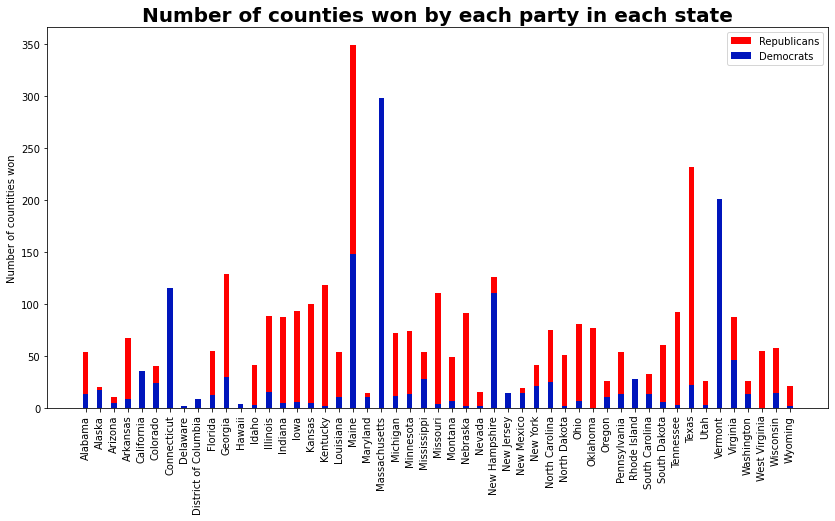

In [18]:
# Extract "won counties" for each party into the list.
rep = list(df_countities
           \.loc[df_countities['party'] == "REP"]["won counties"])
dem = list(df_countities
           \.loc[df_countities['party'] == "DEM"]["won counties"])

# Extract unique "state" strings into the list.
x = list(df_countities["state"].unique())
X_axis = np.arange(len(x))

# Plot the barchart of "won counties" for each candidate. 
plt.figure(figsize = (14,7))
plt.bar(x, rep, 0.4, label = 'Republicans', color = "#FF0000")
plt.bar(x, dem, 0.4, label = 'Democrats', color = "#0015BC")
plt.xticks(X_axis, x)
plt.ylabel("Number of countities won")
plt.title("Number of counties won by each party in each state",\
          fontweight = 'bold', fontsize = 20)
plt.legend()
plt.xticks(rotation=90)

plt.show()

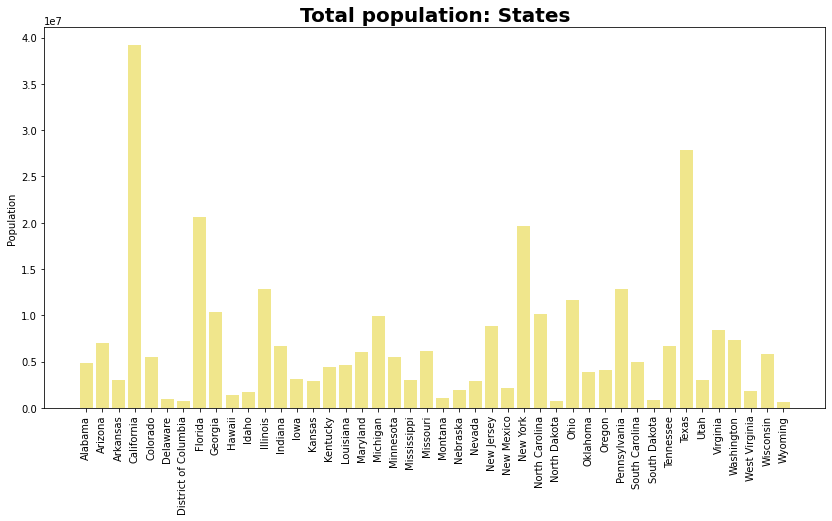

In [19]:
pop = df_president_enrich[["state", "population"]]
\.groupby("state", as_index = False).sum()

plt.figure(1, figsize = (14,7))
plt.bar(pop['state'], pop['population'], color=['#f0e68c'])
plt.ylabel("Population")
plt.title("Total population: States",\
          fontweight = 'bold',\
          fontsize = 20)
plt.xticks(rotation=90)
plt.rc('axes', axisbelow = True)

In [21]:
# Extract the subset from the data set; accessing rows with REP and DEM parties.
df_rd = df_president[df_president.party.isin(["REP","DEM"]) == True].reset_index(drop = True)
# Merge the df_dj subset with additional enriched dataset.
df_rd = df_rd.merge(df_president_enrich[["state", "county", "population","female_percentage","median_age"]])    

In [22]:
# Creating two different DataFrames for eqch candidate.
df_rep = df_rd.loc[df_rd.party == "REP"]
df_dem = df_rd.loc[df_rd.party == "DEM"]

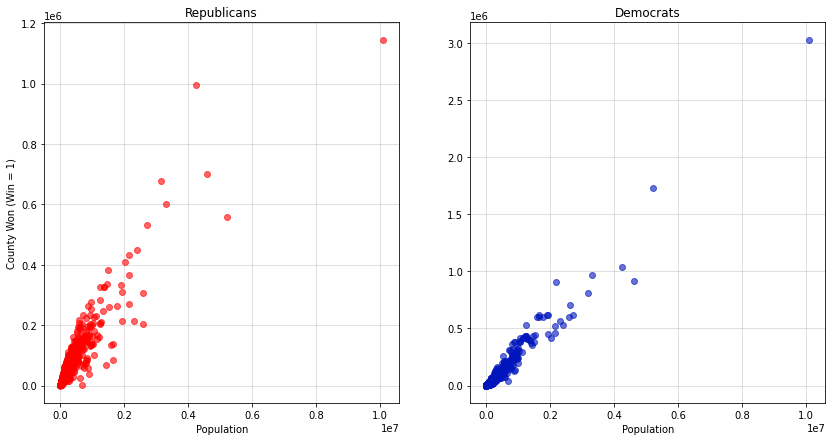

In [23]:
# Plot scatterplot won county with respect to population.
# Create two plot with 1 row and 2 columns.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,7))

# Add scatterplots
ax1.scatter(df_rep['population'] \
            ,df_rep['total_votes']\
            , color=['#FF000099'])
ax2.scatter(df_dem['population']\
            ,df_dem['total_votes'] , color=['#0015BC99'])
ax1.title.set_text("Republicans")
ax2.title.set_text("Democrats")
ax1.set_xlabel("Population")
ax2.set_xlabel("Population")
ax1.set_ylabel("County Won (Win = 1)")
ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)

Scatterplot above suggests that most votes got Democratic Party. 

In [24]:
# Lock observations to counties where candidate won. 
df_rep = df_rep.loc[df_rep.won == True]
df_dem = df_dem.loc[df_dem.won == True]

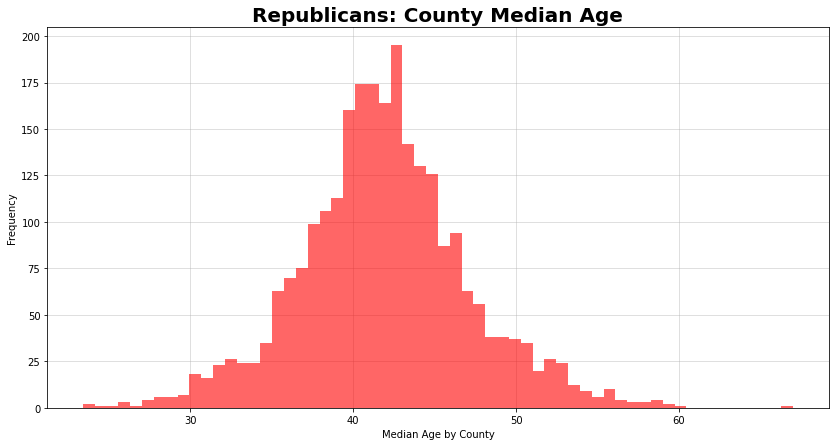

In [25]:
# Plot histogram of median age for REP party (county level). 
plt.figure(figsize = (14,7))
plt.hist(df_rep['median_age'], bins = 60, color=['#FF000099'])
plt.xlabel("Median Age by County")
plt.ylabel("Frequency")
plt.title("Republicans: County Median Age", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county median age where Repuplicans won. We can observe the average value is around 41 years old and distribution has short tails, implying most of the observations lie around the mean. 

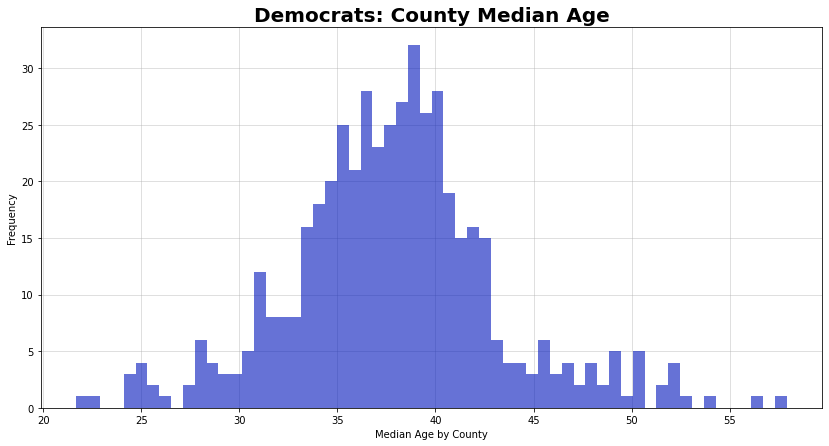

In [26]:
# Plot histogram of median age for DEM party (county level).  
plt.figure(figsize = (14,7))
plt.hist(df_dem['median_age'], bins = 60,  color=['#0015BC99'])
plt.xlabel("Median Age by County")
plt.ylabel("Frequency")
plt.title("Democrats: County Median Age", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county's median age where Democrats won. We can observe the average value is around 36 years old, and distribution has long tails, implying that distribution includes outliers. 

Two histograms shown above suggests that Republican voters are might likely to be older, while Democrat are might likely be younger.  

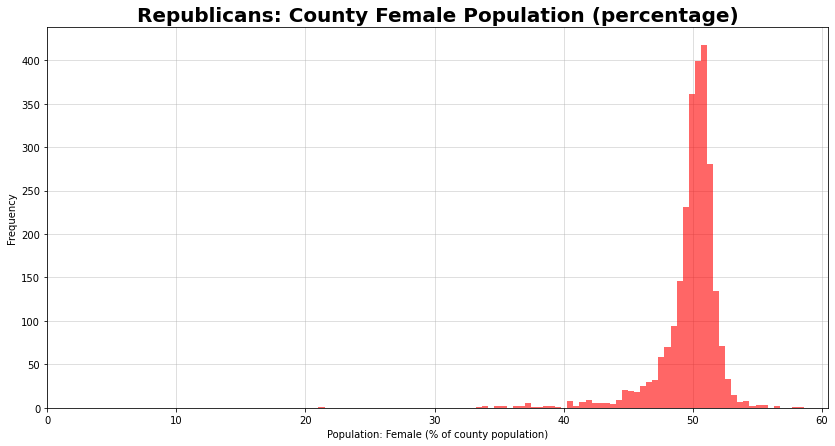

In [27]:
# Plot histogram of female percentage of county population for REP party.
plt.figure(figsize = (14,7))
plt.hist(df_rep['female_percentage'], bins = 80, color=['#FF000099'])
plt.xlabel("Population: Female (% of county population)")
plt.ylabel("Frequency")
plt.xlim(0)
plt.title("Republicans: County Female Population (percentage)", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county female population percentage where Repuplicans won. We can observe the average value is around 50 percent and distribution has long tails, implying that distribution includes outliers. 

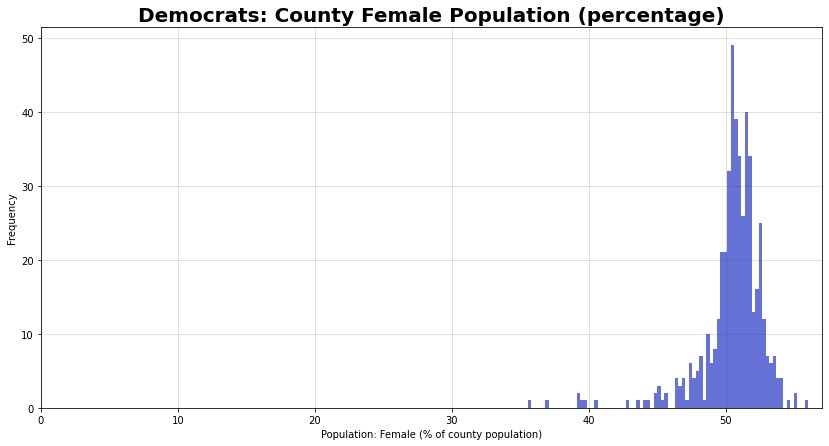

In [29]:
# Plot histogram of female percentage of county population for DEM party.
plt.figure(figsize = (14,7))
plt.hist(df_dem['female_percentage'], bins = 80, color=['#0015BC99'])
plt.xlabel("Population: Female (% of county population)")
plt.ylabel("Frequency")
plt.xlim(0)
plt.title("Democrats: County Female Population (percentage)", fontsize = 20, fontweight = 'bold')
plt.grid(alpha = 0.5)

The histogram above presents each county female population percentage where Democrats won. We can observe the average value is around 52 percent and distribution has short tails, implying most of the observations lie around the mean. 


Two histograms shown above suggests that Republican voters are might likely to be males, while Democrat are might likely be females.  

<h2><center> Summary </center></h2>

---

The report examined preliminary counties' characteristics that influence the total votes they get during the United States election of 2020. The Data analysis suggests that, at this stage, most of the variables do not provide any additional information, suggesting that the supplementary counties' characteristics data be used. The project suggests that the median age for counties where Republicans won is higher than Democrats, Republican Part won most of the counties with a relatively small population, and females are might likely to vote for Democrats than Republicans. 

***However, the additional datasets required to make more comprehensive analysis***

<h2><center> Other Data Sources </center></h2>

---

In [829]:
df_president_enrich

,Unnamed: 0,state,county,candidate,party,total_votes,won,fips,state_code,male,female,median_age,population,female_percentage,lat,long,color
2799,16658,Alabama,Lawrence County,Donald Trump,REP,12322,True,1079,AL,16003,17168,42.2,33171,51.756052,34.521678,-87.310991,red
2802,16670,Alabama,Lowndes County,Joe Biden,DEM,4972,True,1085,AL,4830,5406,41.6,10236,52.813599,32.154746,-86.650108,blue
2803,16674,Alabama,Macon County,Joe Biden,DEM,7108,True,1087,AL,8790,10264,38.0,19054,53.867954,32.385939,-85.692656,blue
2804,16678,Alabama,Madison County,Donald Trump,REP,102780,True,1089,AL,174665,182895,38.5,357560,51.150856,34.763090,-86.550225,red
2805,16682,Alabama,Marengo County,Joe Biden,DEM,5488,True,1091,AL,9446,10092,42.7,19538,51.653189,32.247665,-87.789531,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,16426,Wyoming,Carbon County,Donald Trump,REP,5014,True,56007,WY,8332,7145,38.0,15477,46.165278,41.694360,-106.930667,red
2745,16421,Wyoming,Campbell County,Donald Trump,REP,16975,True,56005,WY,24559,23149,33.5,47708,48.522260,44.248188,-105.548208,red
2744,16416,Wyoming,Big Horn County,Donald Trump,REP,4806,True,56003,WY,6033,5868,41.3,11901,49.306781,44.526690,-107.995183,red
2762,16506,Wyoming,Teton County,Joe Biden,DEM,9848,True,56039,WY,11911,11148,39.3,23059,48.345548,43.934651,-110.589818,blue


We included additional dataset since main dataset does not include any independent variable that might exlpaine dependent total votes variable. The additional dataset which where included in the analysis contains a smaller amount of observations since it includes only the won counties of each party; however, it provides basis charachteristics of county, total poluation and female percentage.